 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [4]:
whale_csv = Path('Resources/whale_returns.csv')
algo_csv = Path('Resources/algo_returns.csv')
sp500_csv = Path('Resources/sp500_history.csv')

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns
whale_df = pd.read_csv(whale_csv)

In [6]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df.dropna(inplace=True)

In [8]:
#confirming nulls have been dropped 
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [9]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_csv)
algo_df

Date    Algo 1    Algo 2
0     2014-05-28  0.001745       NaN
1     2014-05-29  0.003978       NaN
2     2014-05-30  0.004464       NaN
3     2014-06-02  0.005692       NaN
4     2014-06-03  0.005292       NaN
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1241 rows x 3 columns]

In [10]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [11]:
# Drop nulls
algo_df.dropna(inplace=True)

In [12]:
#confirming nulls dropped
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [13]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_csv)
sp500_df 

Date     Close
0     23-Apr-19  $2933.68
1     22-Apr-19  $2907.97
2     18-Apr-19  $2905.03
3     17-Apr-19  $2900.45
4     16-Apr-19  $2907.06
...         ...       ...
1644   5-Oct-12  $1460.93
1645   4-Oct-12  $1461.40
1646   3-Oct-12  $1450.99
1647   2-Oct-12  $1445.75
1648   1-Oct-12  $1444.49

[1649 rows x 2 columns]

In [14]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [15]:
print(sp500_df)

           Date     Close
0     23-Apr-19  $2933.68
1     22-Apr-19  $2907.97
2     18-Apr-19  $2905.03
3     17-Apr-19  $2900.45
4     16-Apr-19  $2907.06
...         ...       ...
1644   5-Oct-12  $1460.93
1645   4-Oct-12  $1461.40
1646   3-Oct-12  $1450.99
1647   2-Oct-12  $1445.75
1648   1-Oct-12  $1444.49

[1649 rows x 2 columns]


In [16]:
sp500_df.columns

Index(['Date', 'Close'], dtype='object')

In [17]:
#dropping date column to get rid of strings
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()

Close
0  $2933.68
1  $2907.97
2  $2905.03
3  $2900.45
4  $2907.06

In [18]:
# Fix Data Types
#dropping dollar signs from close column
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').astype(float)
sp500_df.head()

Close
0  2933.68
1  2907.97
2  2905.03
3  2900.45
4  2907.06

In [19]:
#changing data type of close column
sp500_df['Close'] = sp500_df['Close'].astype('int')
#sp500_df.dtypes

In [20]:
#checking data type change
sp500_df.dtypes

Close    int32
dtype: object

In [21]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

Close
0       NaN
1 -0.008865
2 -0.000688
3 -0.001721
4  0.002414

In [22]:
# Drop nulls
sp500_df.dropna(inplace=True)

In [23]:
# Rename `Close` Column to be specific to this portfolio.
columns = ['Sp500 Returns']
sp500_df.columns = columns
#checking column name change
sp500_df.head()

Sp500 Returns
0           2933
1           2907
2           2905
3           2900
4           2907

## Combine Whale, Algorithmic, and S&P 500 Returns

In [24]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns_data = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
combined_returns_data.dropna(inplace=True)
combined_returns_data.head()


Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
6   2015-03-10                  -0.010263           -0.005341   
7   2015-03-11                   0.004012            0.005163   
8   2015-03-12                   0.008265            0.010272   
9   2015-03-13                  -0.002497           -0.001428   
10  2015-03-16                   0.007901            0.003583   

    TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC        Date    Algo 1  \
6                     -0.012079               -0.009739  2014-06-05  0.004062   
7                      0.003312               -0.001147  2014-06-06  0.001857   
8                      0.013117                0.010801  2014-06-09 -0.005012   
9                     -0.003697               -0.008142  2014-06-10  0.004406   
10                     0.007953                0.008055  2014-06-11  0.004760   

      Algo 2  Sp500 Returns  
6   0.013285           2907  
7   0.008284           2888  
8   0.005668           2888  
9  -0.000735           2878  
10 -0.003761           2895

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [25]:
#dropped dates from columns to get all intergers
algo_df.drop(columns=['Date'], inplace=True)
whale_df.drop(columns=['Date'], inplace=True)

In [26]:
# Plot daily returns of all portfolios

whale_daily_returns  = whale_df.pct_change()
algo_daily_returns = algo_df.pct_change()
sp500_daily_returns = sp500_df.pct_change()

<Axes: >

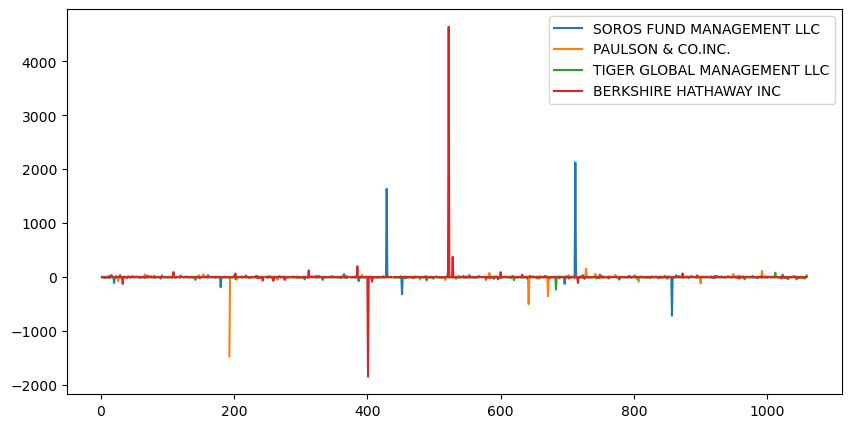

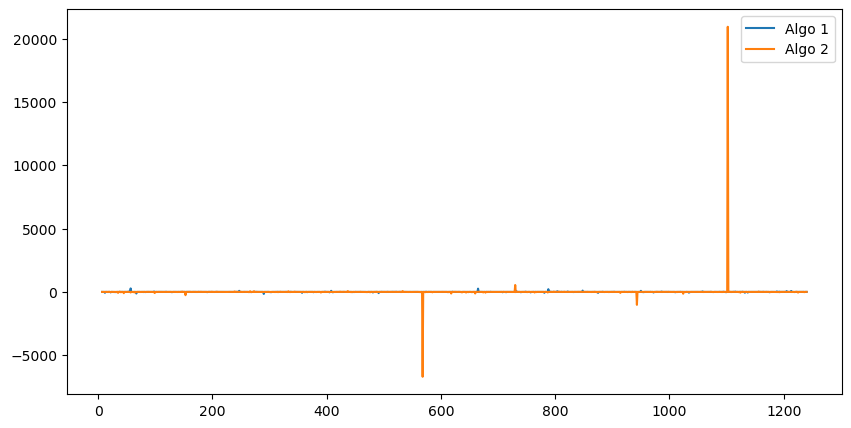

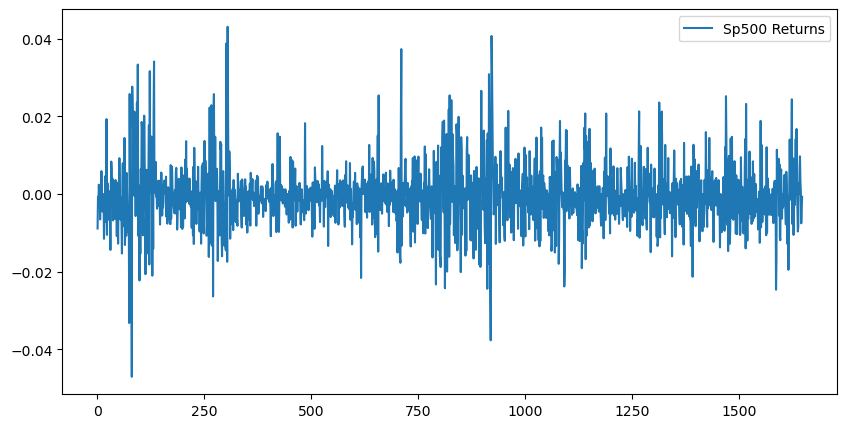

In [29]:
whale_daily_returns.plot(figsize=(10,5))
algo_daily_returns.plot(figsize=(10,5))
sp500_daily_returns.plot(figsize=(10,5))

#### Calculate and Plot cumulative returns.

In [30]:
# Calculate cumulative returns of all portfolios

algo_cumulative_returns = (1 + algo_daily_returns).cumprod() - 1
whale_cumulative_returns = (1 + whale_daily_returns).cumprod() - 1
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod() - 1

C:\Users\Mike Red\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)


<Axes: title={'center': 'Cumulative Returns of Sp500'}>

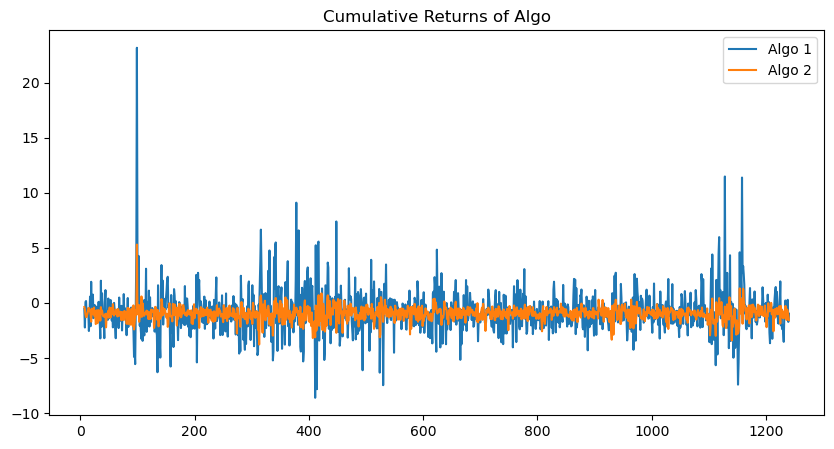

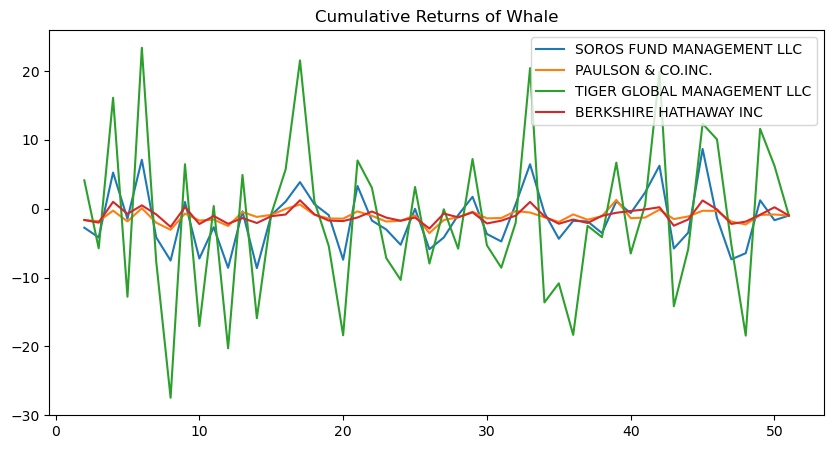

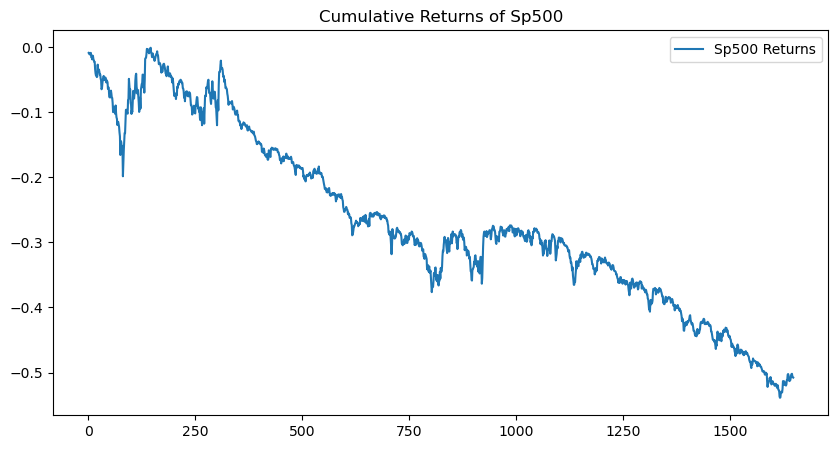

In [31]:
# Plot cumulative returns

algo_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Algo")
whale_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Whale")
sp500_cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns of Sp500")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

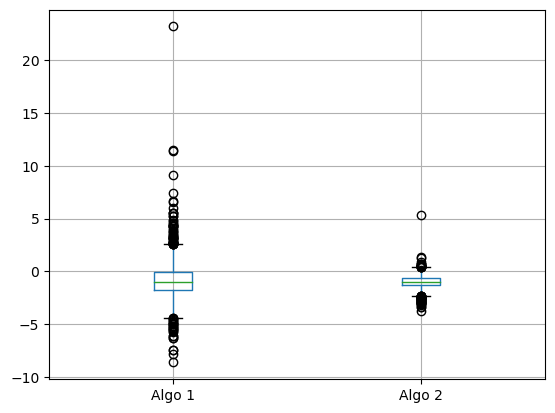

In [32]:
# Box plot to visually show risk
algo_cumulative_returns.boxplot()

<Axes: >

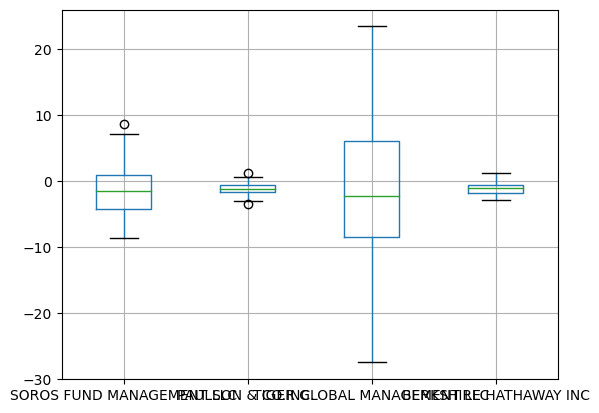

In [33]:
whale_cumulative_returns.boxplot()

<Axes: >

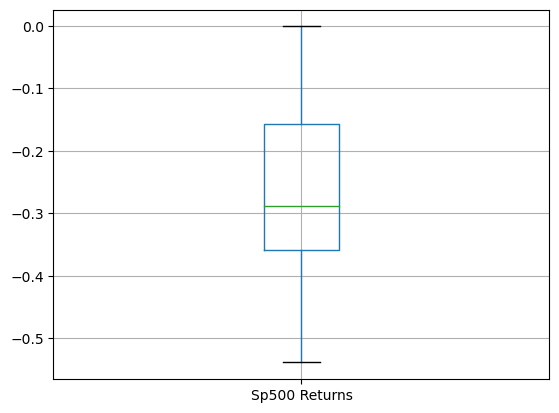

In [34]:
sp500_cumulative_returns.boxplot()

### Calculate Standard Deviations

In [35]:
# Calculate the daily standard deviations of all portfolios
algo_cumulative_returns.std()

Algo 1    1.966911
Algo 2    0.636946
dtype: float64

In [37]:
whale_cumulative_returns.std()

SOROS FUND MANAGEMENT LLC       4.141413
PAULSON & CO.INC.               0.857016
TIGER GLOBAL MANAGEMENT LLC    11.642719
BERKSHIRE HATHAWAY INC          1.016634
dtype: float64

In [38]:
sp500_cumulative_returns.std()

Sp500 Returns    0.136988
dtype: float64

In [39]:
# Calculate  the daily standard deviation of S&P 500
sp500_cumulative_returns.std()


# Determine which portfolios are riskier than the S&P 500

#Tiger global manage,soros,algo 1, berkshire are risky!!!!!



Sp500 Returns    0.136988
dtype: float64

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized standard deviation (252 trading days)
#annualized_standard_deviation = sp500_cumulative_returns.rolling(window=252).std()
#annualized_standard_deviation

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: >

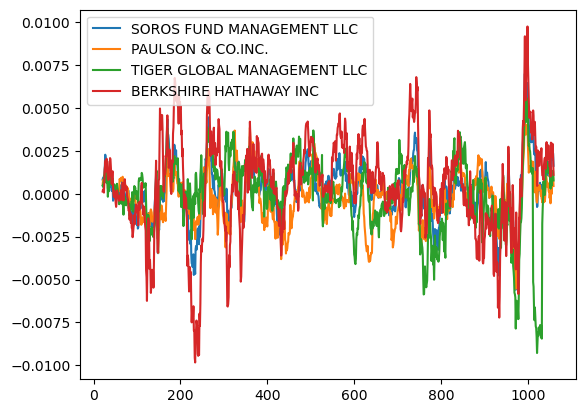

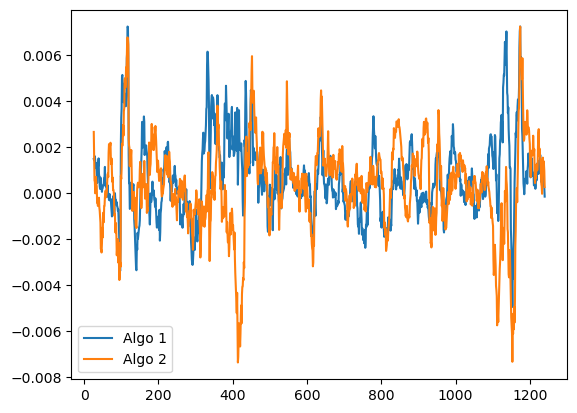

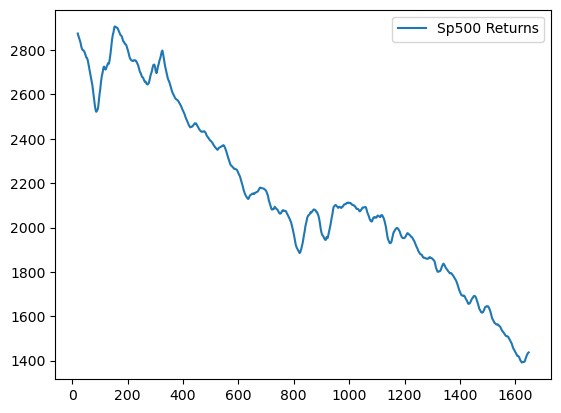

In [41]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_df.rolling(window=21).mean().plot()
algo_df.rolling(window=21).mean().plot()
sp500_df.rolling(window=21).mean().plot()

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [43]:
# Calculate the correlation
price_correlation = combined_returns_data.corr()
# Display de correlation matrix
sns.heatmap(price_correlation, vmin=-1, vmax=1)

ValueError: could not convert string to float: '2015-03-10'

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

-5.92100383786634
92231.07306403847
-6.419749484813248e-05


<Axes: title={'center': 'Rolling 60-Day Covariance of Algo Returns vs. S&P 500 Returns'}>

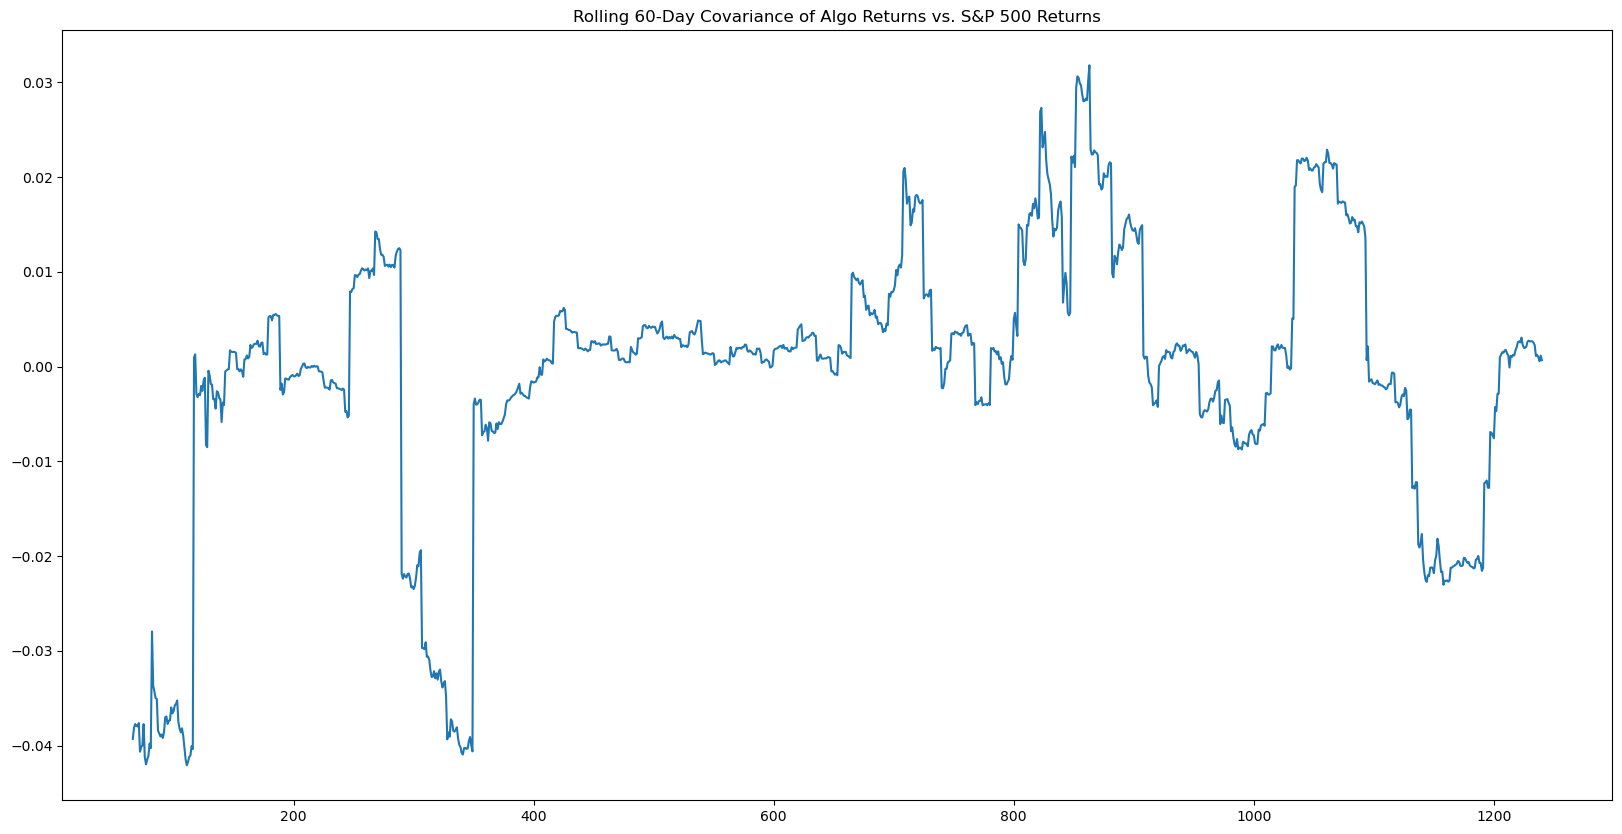

In [44]:
# Calculate covariance of a single portfolio
algo_covariance = algo_daily_returns['Algo 1'].cov(algo_daily_returns['Algo 2'])
print(algo_covariance)

# Calculate variance of S&P 500
sp500_variance = combined_returns_data['Sp500 Returns'].var()
print(sp500_variance)

# Computing beta
algo_beta = algo_covariance / sp500_variance
print(algo_beta)

# Plot beta trend
algo_rolling_covariance = algo_daily_returns['Algo 1'].rolling(window=60).cov(sp500_daily_returns['Sp500 Returns'])
algo_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of Algo Returns vs. S&P 500 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [97]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<Axes: >

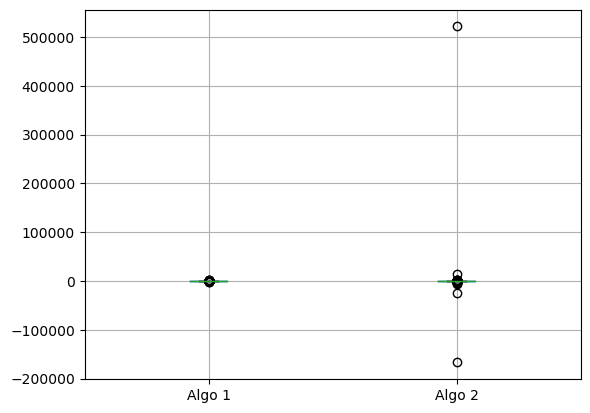

In [45]:
# Annualized Sharpe Ratios
#Algo Sharpe Ratio
algo_daily_std = algo_cumulative_returns.std()
algo_annualized_sharpe_ratio = (algo_daily_returns / algo_daily_std) * np.sqrt(252)

algo_annualized_sharpe_ratio.boxplot()


C:\Users\Mike Red\anaconda3\Lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<Axes: >

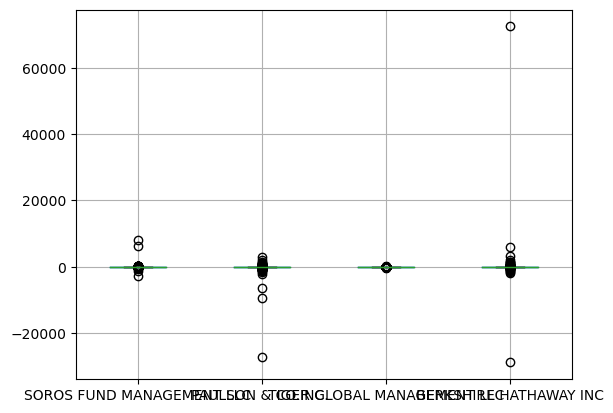

In [46]:
whale_daily_std = whale_cumulative_returns.std()
whale_annualized_sharpe_ratio = (whale_daily_returns / whale_daily_std) * np.sqrt(252)

whale_annualized_sharpe_ratio.boxplot()

<Axes: >

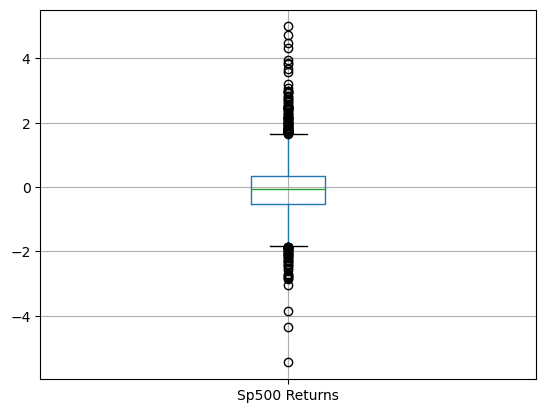

In [47]:
# Visualize the sharpe ratios as a bar plot
sp500_daily_std = sp500_cumulative_returns.std()
sp500_annualized_sharpe_ratio = (sp500_daily_returns / sp500_daily_std) * np.sqrt(252)

sp500_annualized_sharpe_ratio.boxplot()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [48]:
# Reading data from 1st stock
apple_csv = Path('Resources/aapl_historical.csv')
apple_df = pd.read_csv(apple_csv)    
apple_df.head()

Symbol Trade DATE    NOCP
0   AAPL   5/9/2019  200.72
1   AAPL   5/8/2019  202.90
2   AAPL   5/7/2019  202.86
3   AAPL   5/6/2019  208.48
4   AAPL   5/3/2019  211.75

In [49]:
# Reading data from 2nd stock
cost_csv = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_csv)
cost_df.head()

Symbol Trade DATE    NOCP
0   COST   5/9/2019  243.47
1   COST   5/8/2019  241.34
2   COST   5/7/2019  240.18
3   COST   5/6/2019  244.23
4   COST   5/3/2019  244.62

In [50]:
# Reading data from 3rd stock
goog_csv = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_csv)
goog_df.head()

Symbol Trade DATE     NOCP
0   GOOG   5/9/2019  1162.38
1   GOOG   5/8/2019  1166.27
2   GOOG   5/7/2019  1174.10
3   GOOG   5/6/2019  1189.39
4   GOOG   5/3/2019  1185.40

In [51]:
# Combine all stocks in a single DataFrame
all_stocks_df = pd.concat([goog_df, cost_df, apple_df], axis="columns", join="inner")
all_stocks_df.head()

Symbol Trade DATE     NOCP Symbol Trade DATE    NOCP Symbol Trade DATE  \
0   GOOG   5/9/2019  1162.38   COST   5/9/2019  243.47   AAPL   5/9/2019   
1   GOOG   5/8/2019  1166.27   COST   5/8/2019  241.34   AAPL   5/8/2019   
2   GOOG   5/7/2019  1174.10   COST   5/7/2019  240.18   AAPL   5/7/2019   
3   GOOG   5/6/2019  1189.39   COST   5/6/2019  244.23   AAPL   5/6/2019   
4   GOOG   5/3/2019  1185.40   COST   5/3/2019  244.62   AAPL   5/3/2019   

     NOCP  
0  200.72  
1  202.90  
2  202.86  
3  208.48  
4  211.75

In [62]:
# Reset Date index
all_stocks_df.set_index(inplace=True)
#all_stocks_df.reset_index(drop=True, inplace=True)

TypeError: DataFrame.set_index() missing 1 required positional argument: 'keys'

In [63]:
# Reorganize portfolio data by having a column per symbol
all_stocks_df

Symbol     NOCP Symbol    NOCP Symbol    NOCP
0     GOOG  1162.38   COST  243.47   AAPL  200.72
1     GOOG  1166.27   COST  241.34   AAPL  202.90
2     GOOG  1174.10   COST  240.18   AAPL  202.86
3     GOOG  1189.39   COST  244.23   AAPL  208.48
4     GOOG  1185.40   COST  244.62   AAPL  211.75
..     ...      ...    ...     ...    ...     ...
245   GOOG  1078.59   COST  199.60   AAPL  186.99
246   GOOG  1081.77   COST  198.71   AAPL  188.18
247   GOOG  1079.23   COST  195.48   AAPL  186.44
248   GOOG  1100.20   COST  195.88   AAPL  188.15
249   GOOG  1098.26   COST  195.76   AAPL  188.59

[250 rows x 6 columns]

In [66]:
all_stocks_df.drop(columns=['Symbol'], inplace=True)
all_stocks_df.head()

NOCP    NOCP    NOCP
0  1162.38  243.47  200.72
1  1166.27  241.34  202.90
2  1174.10  240.18  202.86
3  1189.39  244.23  208.48
4  1185.40  244.62  211.75

In [67]:
all_stocks_df.columns = ['GOOG', 'COST', 'APPLE']
all_stocks_df.head()

GOOG    COST   APPLE
0  1162.38  243.47  200.72
1  1166.27  241.34  202.90
2  1174.10  240.18  202.86
3  1189.39  244.23  208.48
4  1185.40  244.62  211.75

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [70]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stocks_daily_returns = all_stocks_df.pct_change()
stocks_daily_returns.head()

GOOG      COST     APPLE
0       NaN       NaN       NaN
1  0.003347 -0.008749  0.010861
2  0.006714 -0.004806 -0.000197
3  0.013023  0.016862  0.027704
4 -0.003355  0.001597  0.015685

In [71]:
weights = [1/3, 1/3, 1/3]
stocks_portfolio_returns = stocks_daily_returns.dot(weights)

# Display sample data
stocks_portfolio_returns.head()

0         NaN
1    0.001820
2    0.000570
3    0.019196
4    0.004642
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
# Join your returns DataFrame to the original returns DataFrame
all_appended_data = pd.concat([stocks_daily_returns, whale_daily_returns, algo_daily_returns,  sp500_daily_returns], axis="columns", join="inner")
all_appended_data.head()

GOOG      COST     APPLE  SOROS FUND MANAGEMENT LLC  \
6   0.004705 -0.004533  0.006550                 -18.625495   
7   0.017465  0.016309 -0.046789                  -1.390912   
8   0.083384 -0.005091  0.019634                   1.060018   
9  -0.011960 -0.001883 -0.001515                  -1.302164   
10 -0.006862  0.007300  0.004797                  -4.163697   

    PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  \
6            -2.263954                    -3.067380                4.893672   
7            -1.966750                    -1.274177               -0.882260   
8             0.989412                     2.960622              -10.419761   
9            -1.139064                    -1.281865               -1.753810   
10           -3.508046                    -3.151096               -1.989242   

      Algo 1    Algo 2  Sp500 Returns  
6        NaN       NaN       0.000688  
7  -0.542965 -0.376459      -0.006536  
8  -3.699288 -0.315757       0.000000  
9  -1.879164 -1.129760      -0.003463  
10  0.080354  4.113963       0.005907

In [73]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_appended_data.dropna(inplace=True)
all_appended_data.head()

GOOG      COST     APPLE  SOROS FUND MANAGEMENT LLC  \
7   0.017465  0.016309 -0.046789                  -1.390912   
8   0.083384 -0.005091  0.019634                   1.060018   
9  -0.011960 -0.001883 -0.001515                  -1.302164   
10 -0.006862  0.007300  0.004797                  -4.163697   
11 -0.005897  0.009609  0.009158                  -0.728894   

    PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  \
7            -1.966750                    -1.274177               -0.882260   
8             0.989412                     2.960622              -10.419761   
9            -1.139064                    -1.281865               -1.753810   
10           -3.508046                    -3.151096               -1.989242   
11           -0.182672                    -1.086405               -0.952281   

      Algo 1    Algo 2  Sp500 Returns  
7  -0.542965 -0.376459      -0.006536  
8  -3.699288 -0.315757       0.000000  
9  -1.879164 -1.129760      -0.003463  
10  0.080354  4.113963       0.005907  
11 -1.005932  0.021230      -0.001036

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [80]:
# Calculate the annualized `std`
all_data_sd = all_appended_data.std()
all_data_sd.dropna(inplace=True)
all_data_sd

GOOG              0.017012
COST              0.013381
APPLE             0.018919
Algo 1           21.519488
Algo 2           20.602326
Sp500 Returns     0.009637
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: >

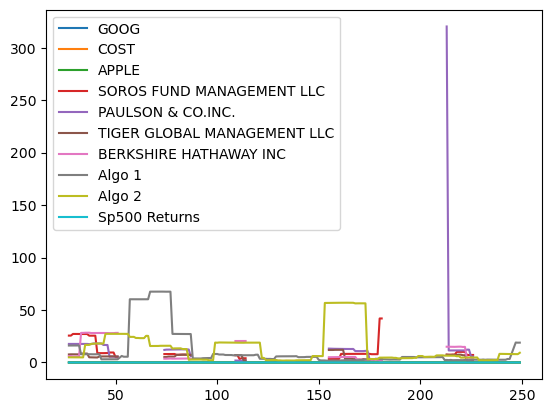

In [85]:
# Calculate rolling standard deviation
rolling_std_21 = all_appended_data.rolling(window=21).std()
rolling_std_21.plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

<Axes: >

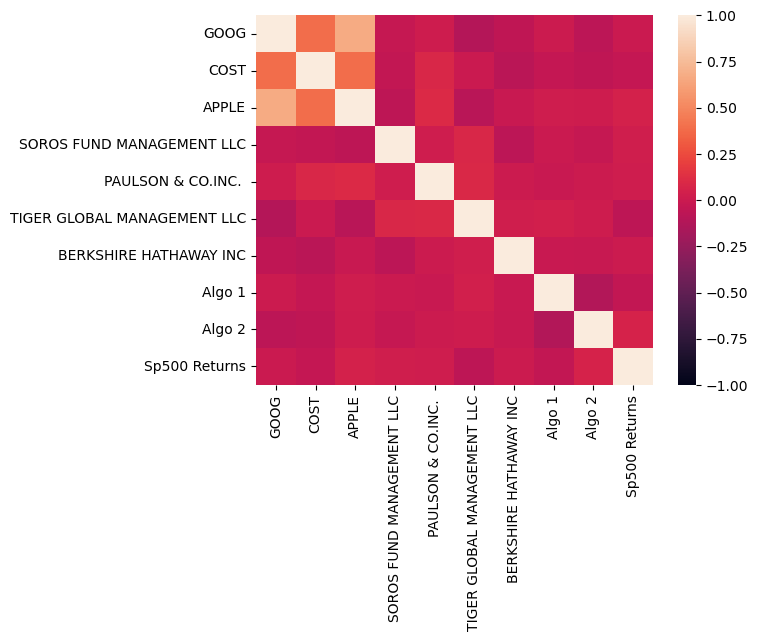

In [88]:
# Calculate and plot the correlation
stock_price_correlation = all_appended_data.corr()
sns.heatmap(stock_price_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [101]:
# Calculate and plot Beta
stock_covariance = all_appended_data['GOOG'].cov(all_appended_data['Sp500 Returns'])
stock_covariance

-5.769928893863025e-07

In [105]:
stock_variance = all_appended_data['Sp500 Returns'].var()
stock_variance

9.287578672631583e-05

In [106]:
goog_beta = stock_covariance / stock_variance

<Axes: title={'center': 'Rolling 60-Day Covariance of GOOG Returns vs. S&P 500 Returns'}>

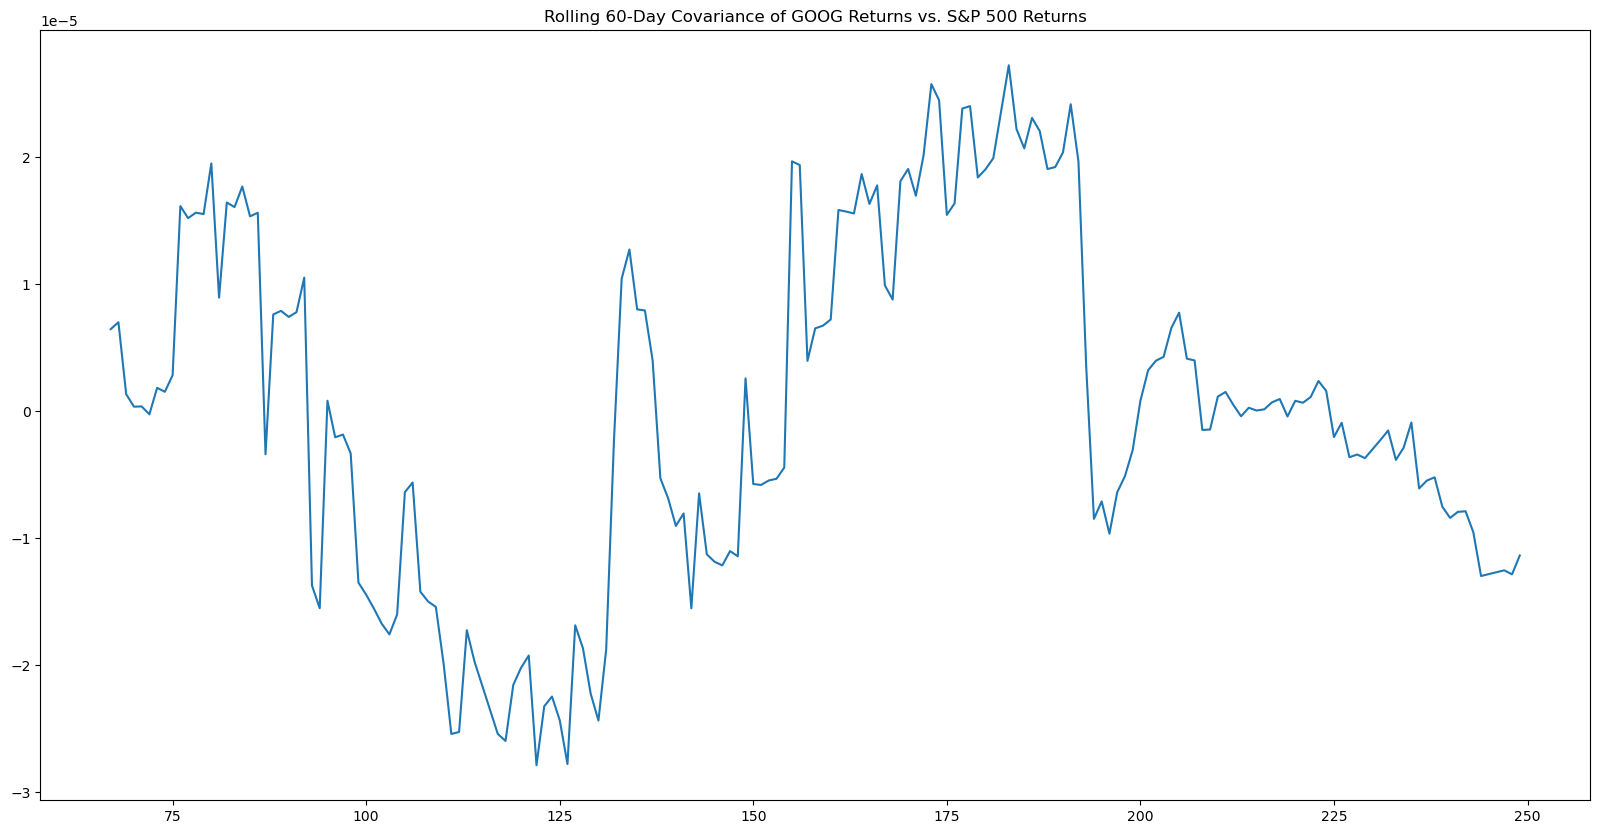

In [108]:
stock_rolling_covariance = all_appended_data['GOOG'].rolling(window=60).cov(all_appended_data['Sp500 Returns'])
stock_rolling_covariance.plot(figsize=(20, 10), title='Rolling 60-Day Covariance of GOOG Returns vs. S&P 500 Returns')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<Axes: >

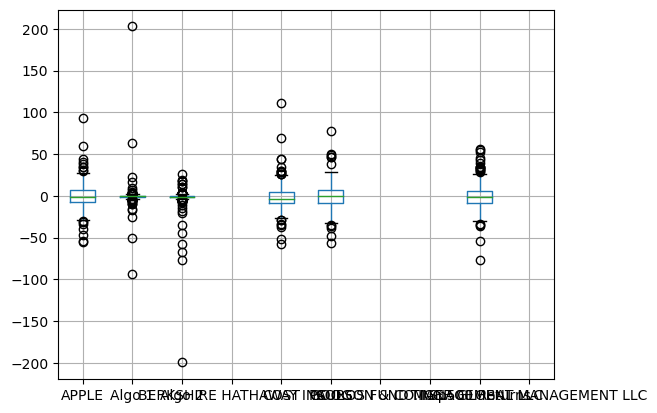

In [112]:
# Calculate Annualized Sharpe Ratios
my_annualized_sharpe_ratio = (all_appended_data / all_data_sd) * np.sqrt(252)

my_annualized_sharpe_ratio.boxplot()

In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!